<a href="https://colab.research.google.com/github/kefasmanu/NLP-FELLOWSHIP/blob/main/quora%20classification%20competition/quora_classification_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# quora insincere question classification-Deep Learning and Neural Networks

Outline:
1. Download the Data from Kaggle
2. Prepare the data for modeling
3. Train a deep learning model using Pytorch

## Download Data From Kaggle

Get the Kaggle API key to download

In [1]:
!ls #list of files

sample_data


In [12]:
!pwd# CORRENT WORRKING DIRECTORY

/bin/bash: pwd#: command not found


In [13]:
import os

In [14]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [20]:
#!chmod 600 /content/kaggle.json

In [22]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 139MB/s]


In [23]:
#Create some variables to store the files
train_fname = './train.csv.zip'
test_fname='./test.csv.zip'
sub_fname ='./sample_submission.csv.zip'

In [24]:
import pandas as pd

In [27]:
#Reading the data into pandas dataframe
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df= pd.read_csv(sub_fname)

In [28]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [30]:
# we have to make prediction on this df
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [31]:
#Sample of submission file
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [33]:
#picking a sample size for the training data so the model can run quickly
SAMPLE_SIZE =100_000
sample_df =raw_df.sample(SAMPLE_SIZE)
sample_df

,qid,question_text,target
1280511,faf59149482da425775d,Who live highest days in spaceship?,0
296220,39ffa85d3f9f9cc3969a,How come everything created or invented by man...,0
520210,65d874b519620bb0a49c,What does a high-arch pronation indicate?,0
1139120,df3b10c456aa11123bc4,How can I repair plaster walls over concrete?,0
99975,13947d2002fae162f941,Does Google use SSDs or HDDs in their servers?,0
...,...,...,...
598188,752a7faddc12742a37e6,Is it possible to be both a monetarist and a k...,0
167804,20ca8369f16f4c23ffc5,What are the documents to be attested for empl...,0
563391,6e60a98bec27614f7773,What’s the minimum hight requirement to become...,0
528942,678f5b6806ea21f71499,How does malnutrition affect science?,0


In [34]:
#confirming if the sample df contains both sincere and insincere questions
sample_df.target.value_counts(normalize=True)

0    0.93863
1    0.06137
Name: target, dtype: float64

Something most be done to deal with the class imbalanced

## Prepare Data For Training

1. Convert the text to TF-IDF Vectors
2. Convert vectors  to Pytorch tensors
3. Create Pytorch Data Loaders

### Convert to TF-IDF Vectors

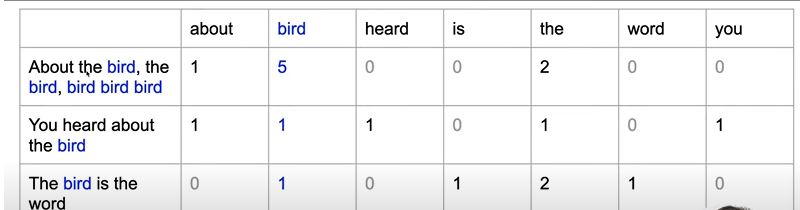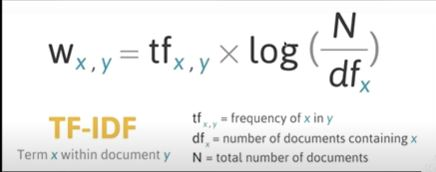

The first is for bag of words while the second is for the TF-IDF

In [42]:
#The document need to be tokenized
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
english_stopwords = stopwords.words('english')
', '.join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [46]:
#Stemming
stemmer = SnowballStemmer(language='english')



In [47]:
def tokenize(text):
  return  [stemmer.stem(token) for token in word_tokenize(text)]

In [41]:
stemmer.stem('Translation')

'translat'

In [37]:
#tonizing sentence
word_tokenize('This just to try the tokenizer')

['This', 'just', 'to', 'try', 'the', 'tokenizer']

In [54]:
#we use tf_idf vectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
from numpy.lib.function_base import vectorize
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=english_stopwords, max_features=1000)
#Max_features = 1000 will look at the most common 1000 vocabularies and create a vector out of it

In [60]:
#will fit into the vectorizer sample_df; it will stem, remove stopwords and tokenize the words
sample_df.question_text

1280511                  Who live highest days in spaceship?
296220     How come everything created or invented by man...
520210             What does a high-arch pronation indicate?
1139120        How can I repair plaster walls over concrete?
99975         Does Google use SSDs or HDDs in their servers?
                                 ...                        
598188     Is it possible to be both a monetarist and a k...
167804     What are the documents to be attested for empl...
563391     What’s the minimum hight requirement to become...
528942                 How does malnutrition affect science?
1298246    What strategies do we use in Online Reputation...
Name: question_text, Length: 100000, dtype: object

In [61]:
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f7040ae0550>)

In [62]:
#looking at the vocabulary eg first 100 words
vectorizer.get_feature_names_out()[:100]


array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '11', '12', '12th', '15', '2', '20', '2017',
       '2018', '3', '30', '4', '5', '6', '7', '8', ':', '?', '[', ']',
       '``', 'abl', 'abroad', 'abus', 'accept', 'accomplish', 'accord',
       'account', 'achiev', 'acid', 'act', 'action', 'activ', 'actor',
       'actual', 'ad', 'add', 'address', 'admiss', 'adult', 'advanc',
       'advantag', 'advic', 'affect', 'africa', 'african', 'age', 'ago',
       'air', 'allow', 'almost', 'alon', 'alreadi', 'also', 'altern',
       'alway', 'amazon', 'america', 'american', 'amount', 'analysi',
       'ancient', 'android', 'ani', 'anim', 'anoth', 'answer', 'anyon',
       'anyth', 'apart', 'app', 'appear', 'appl', 'appli', 'applic',
       'approach', 'arab', 'area', 'armi', 'around', 'art', 'asian',
       'ask', 'associ', 'atheist'], dtype=object)

### Transform the questions into vectors

In [63]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 29.8 s, sys: 15.5 ms, total: 29.8 s
Wall time: 29.9 s


In [64]:
#checking
inputs.shape

(100000, 1000)

In [65]:
inputs.toarray()[:50]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
%%time
test_inputs = vectorizer.transform(test_df.question_text) # this will transform the test input using the vocabularies we have trained 

CPU times: user 2min 3s, sys: 312 ms, total: 2min 3s
Wall time: 2min 9s


In [67]:
test_inputs.shape

(375806, 1000)

### Split the data into training and validation set

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
targets = sample_df.target

In [70]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size =0.3)

In [71]:
train_inputs.shape

(70000, 1000)

In [72]:
val_inputs.shape

(30000, 1000)

In [75]:
train_targets

742997     0
396778     0
468690     0
1191419    0
307404     0
          ..
707165     0
1018284    0
305002     0
459517     0
388889     0
Name: target, Length: 70000, dtype: int64

In [76]:
val_targets

626928     1
108814     0
235396     0
103611     1
1063495    0
          ..
970624     0
672102     0
1086359    0
622118     0
354636     0
Name: target, Length: 30000, dtype: int64

### Convert into PyTorch Tensors

In [77]:
#this will be done using pytorch deeplearning library

import torch


In [79]:
train_inputs

<70000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 382877 stored elements in Compressed Sparse Row format>

In [81]:
train_input_tensors = torch.tensor(train_inputs.toarray()).float() # has to be converted to a numpy array because its a sparse matrix
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

In [82]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [83]:
val_input_tensors.shape

torch.Size([30000, 1000])

In [85]:
train_targets#pandas series type

742997     0
396778     0
468690     0
1191419    0
307404     0
          ..
707165     0
1018284    0
305002     0
459517     0
388889     0
Name: target, Length: 70000, dtype: int64

In [86]:
train_target_tensors = torch.tensor(train_targets.values).float()# using .values will give numpyarray
val_target_tensors= torch.tensor(val_targets.values).float()

In [89]:
#also converting the test inputs
test_input_tensors= torch.tensor(test_inputs.toarray()).float()

NOTE: How pytorch works in deeplearning, because we are working with large models you often have to train the model not using the entire dataset but using a batch of the data.For example this Training set using PyTorch Data Loader.
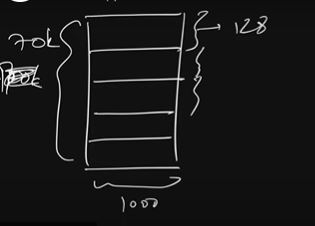

### Create PyTorch Data Loader.

In [90]:
from torch.utils.data import TensorDataset, DataLoader

In [92]:
#First creating a tensor dataset
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)

test_ds = TensorDataset(test_input_tensors)

In [94]:
BATCH_SIZE =128

In [95]:
#Creating a data loader
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE,shuffle=True)# Shuffle = True is just for the purpose of training
val_dl = DataLoader(val_ds, batch_size =BATCH_SIZE)#No need shuffling because we are only using it for validation
test_dl =DataLoader(test_ds, batch_size=BATCH_SIZE)



In [96]:
#Using the batch

for batch in train_dl:
  batch_inputs = batch[0]
  batch_targets = batch[1]
  print(f'batch_inputs.shape{ batch_inputs.shape}')
  print(f'batch_targets.shape{ batch_targets.shape}')
  break # it will print only the first iteration batches

batch_inputs.shapetorch.Size([128, 1000])
batch_targets.shapetorch.Size([128])


In [98]:
#len of batches(the number of batches in the data)
len(train_dl) 

547

In [99]:
128*547

70016

## Train Deep Learning Model
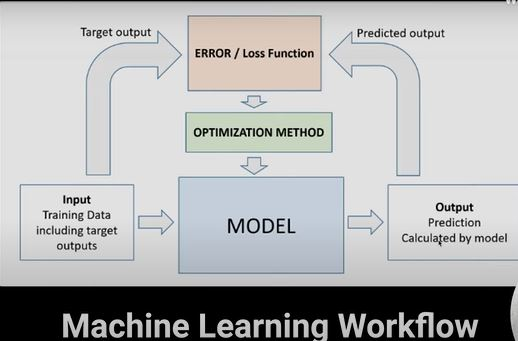

In [103]:

#libraries
import torch.nn as nn
import torch.nn.functional as F

In [119]:
#create deep learning model

class QuoraNet(nn.Module):

  #setting up the layers of the module
  def __init__(self):  
    super().__init__()
    #Starting with a thousand inputs and reducing it to 512
    self.layer1 =nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128,1)
    pass

  def forward(self,inputs):
    out= self.layer1(inputs)
    out = F.relu(out)

    out= self.layer2(out)
    out = F.relu(out)

    out= self.layer3(out)
    out = F.relu(out)

    out= self.layer4(out)#No activation to the final layer
    
    return out



In [120]:
model = QuoraNet()

In [121]:
from sklearn.metrics import accuracy_score, f1_score

In [243]:
for batch in train_dl:
  bi, bt = batch
  print(f'inputs.shape {bi.shape}')
  print(f'targets.shape{bt.shape}')

  bo = model(bi)
  print(f'bo.shape {bo.shape}')

  #Convert outputs to probabilities
  probs = torch.sigmoid(bo[:,0])
  print('probs',probs[:10])

  #convert probs to predictions
  preds =(probs>0.5).int()
  print('Preds', preds[:10])
  print('targets',bt[:10])

  #Check metrics
  print(f'accuracy: {accuracy_score(bt, preds)}')
  print(f'f1_score: : {f1_score(bt, preds)}')

  #loss
  print('loss', F.binary_cross_entropy(probs.float(), bt.float()))

  break



inputs.shape torch.Size([128, 1000])
targets.shapetorch.Size([128])
bo.shape torch.Size([128, 1])
probs tensor([1.6614e-10, 3.9256e-03, 4.7118e-08, 2.3058e-03, 1.1338e-06, 1.4492e-07,
        2.1598e-08, 1.0777e-07, 2.8760e-07, 1.7851e-05],
       grad_fn=<SliceBackward0>)
Preds tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
targets tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
accuracy: 0.9765625
f1_score: : 0.5714285714285715
loss tensor(0.0604, grad_fn=<BinaryCrossEntropyBackward0>)


In [176]:
#Evaluate model performance
def evaluate(model, dl):
  losses, accs, f1s = [],[],[]
  #loop over  batches
  for batch in dl:

    #Get inputs and targets
    inputs, targets = batch

    #pass the inputs through model
    outputs = model(inputs)

    #Convert to probabilities
    probs = torch.sigmoid(outputs[:,0])

    #compute loss
    loss = F.binary_cross_entropy(probs.float(), targets.float(), weight=torch.tensor(20))# since 94% has class 0, we can give equal importance to class 1 and 0 by using torch.tensor(20) by applying a weight of 20 to the tow classes

    #compute preds
    preds = (probs > 0.5).int()

    #compute accuracy and f1_score
    acc = accuracy_score(targets, preds)
    f_score = f1_score(targets,preds)

    losses.append(loss.item())
    accs.append(acc)
    f1s.append(f_score)

  return (torch.mean(torch.tensor(losses)).item(),
         torch.mean(torch.tensor(accs)).item(),
         torch.mean(torch.tensor(f1s)).item())


In [177]:
evaluate(model, train_dl)

(0.31332680583000183, 0.995072554844607, 0.9578548111981019)

In [178]:
evaluate(model, val_dl)

(7.724770545959473, 0.9356826241134751, 0.3905746226634179)

In [179]:
from torch.optim import optimizer
#Train the model batch by batch
def fit(epochs, lr, model, train_dl, val_dl):
  history = []

  optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay = 1e-5)
  for epoch in range(epochs):

    #for each epoch phase
    for batch in train_dl:
      #get inputs and targets
      inputs, targets = batch

      #Get model outputs
      outputs = model(inputs)

      #Get the probabilty
      probs = torch.sigmoid(outputs[:,0])

      #compute the loss
      loss =F.binary_cross_entropy(probs.float(), targets.float())

      #Perform the optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    #Evaluation phase
    loss, acc, f1 = evaluate(model, val_dl)
    print(f'Epoch: {epoch+1} Loss:{loss} Accuracy: {acc} F1 Score {f1}')
    history.append([loss, acc, f1])
  return history




In [180]:
#starting the model afresh
model = QuoraNet()

In [181]:
history =[]

In [182]:
history.append(evaluate(model, val_dl))

In [183]:
history

[(13.42508316040039, 0.9378989361702128, 0.0)]

In [184]:
history +=fit(5,0.001, model, train_dl, val_dl)

Epoch: 1 Loss:3.034994602203369 Accuracy: 0.9450243794326241 F1 Score 0.38105850263738406
Epoch: 2 Loss:2.955665111541748 Accuracy: 0.9467641843971631 F1 Score 0.4116574494782953
Epoch: 3 Loss:2.9863927364349365 Accuracy: 0.9476174645390071 F1 Score 0.4347628552807251
Epoch: 4 Loss:3.5377309322357178 Accuracy: 0.9441600177304964 F1 Score 0.4345452797328317
Epoch: 5 Loss:4.720080852508545 Accuracy: 0.9427526595744681 F1 Score 0.390313704960947


In [185]:
history +=fit(5, 0.0001, model, train_dl, val_dl)

Epoch: 1 Loss:5.551537990570068 Accuracy: 0.9411679964539007 F1 Score 0.4027909560522695
Epoch: 2 Loss:5.9990363121032715 Accuracy: 0.941899379432624 F1 Score 0.40268013452192475
Epoch: 3 Loss:6.129576206207275 Accuracy: 0.9384973404255319 F1 Score 0.4162490080686167
Epoch: 4 Loss:6.474095344543457 Accuracy: 0.939915780141844 F1 Score 0.39932635745020795
Epoch: 5 Loss:6.893685817718506 Accuracy: 0.9414671985815602 F1 Score 0.38685509887359454


In [186]:
history


[(13.42508316040039, 0.9378989361702128, 0.0),
 [3.034994602203369, 0.9450243794326241, 0.38105850263738406],
 [2.955665111541748, 0.9467641843971631, 0.4116574494782953],
 [2.9863927364349365, 0.9476174645390071, 0.4347628552807251],
 [3.5377309322357178, 0.9441600177304964, 0.4345452797328317],
 [4.720080852508545, 0.9427526595744681, 0.390313704960947],
 [5.551537990570068, 0.9411679964539007, 0.4027909560522695],
 [5.9990363121032715, 0.941899379432624, 0.40268013452192475],
 [6.129576206207275, 0.9384973404255319, 0.4162490080686167],
 [6.474095344543457, 0.939915780141844, 0.39932635745020795],
 [6.893685817718506, 0.9414671985815602, 0.38685509887359454]]

In [188]:
losses = [ item[0] for item in history ]
accs =  [item[1] for item in history]
f1s = [item[2] for item in history]


In [189]:
import matplotlib.pyplot as plt


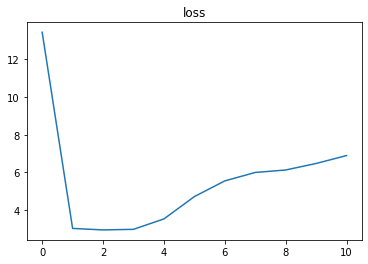

In [190]:
plt.title('loss')
plt.plot(losses)

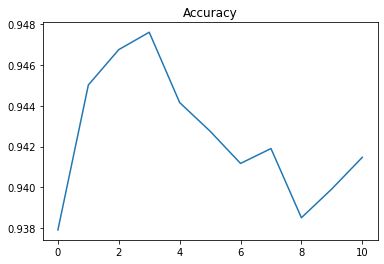

In [191]:
plt.title('Accuracy')
plt.plot(accs)

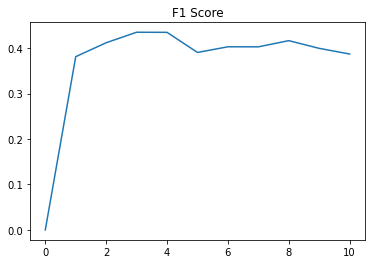

In [192]:
plt.title("F1 Score")
plt.plot(f1s)

### Make Predictions on example data


In [216]:
small_df = raw_df.sample(50)
small_df

,qid,question_text,target
1210912,ed556c54a124c4610983,What strategy should I opt to score 100 in phy...,0
909681,b23ed6a2ab5761d67565,What is the average package at placements for ...,0
155930,1e808825bf3efc284192,What are some sweet wine types?,0
590336,73a4b3372b020af32672,How can I stop crashing my knuckles?,0
799975,9cc0a6ef9d30d82232ff,What are the types of PLC?,0
1211105,ed5f99b0ed8a20547a31,Is penicillin bacteriostatic or bactericidal?,0
948445,b9d9b28d7ce3d7d86754,What is embalming and how it is done?,0
696000,88502cc8423914ffe1a0,What is some good modern thrash metal?,0
438991,560703dc9c40db8cdf82,Is Shahid Kapoor & Mira Rajput a Bollywood ver...,1
657431,80c54b8132a7d2374c6d,How frequent are apsrtc busses from Visakhapat...,0


In [221]:
#Predicting a dataframe
def predict_df(df):
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds= (probs>0.5).int()
  return preds

In [222]:
small_df.target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [223]:
predict_df(small_df)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], dtype=torch.int32)

In [224]:
small_df.question_text.values

array(['What strategy should I opt to score 100 in physics in JEE Mains?',
       'What is the average package at placements for MBA at MSRIM?',
       'What are some sweet wine types?',
       'How can I stop crashing my knuckles?',
       'What are the types of PLC?',
       'Is penicillin bacteriostatic or bactericidal?',
       'What is embalming and how it is done?',
       'What is some good modern thrash metal?',
       'Is Shahid Kapoor & Mira Rajput a Bollywood version of 50 Shades of Grey with RSSB as a cover for their BDSM relationship?',
       'How frequent are apsrtc busses from Visakhapatnam complex to vizianagaram and their timings?',
       'How could you show off your total skills to a company?',
       'Is Trump racist? If yes where is the proof?',
       'Is Liam Casey lying about his IQ? If not, then which version of the IQ test did he take that went as high as 165?',
       'Why do you use Quora and who advised you for using it?',
       'What has MapQuest achieve

In [225]:
#predicting a text
def predict_text(text):
  df = pd.DataFrame({'question_text': [text]})
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds= (probs>0.5).int()
  return preds

In [227]:
predict_text('What is your name')

tensor([0], dtype=torch.int32)

In [230]:
predict_text("Why can't you realize how stupid your ideas are")

tensor([1], dtype=torch.int32)

## Generate Predictions for Test Set

In [231]:
test_inputs

<375806x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2056603 stored elements in Compressed Sparse Row format>

In [250]:
import numpy as np
def make_preds(dl):
  all_preds=[]
  for batch in dl:
    inputs = batch[0]
    outputs =model(inputs)
    probs = torch.sigmoid(outputs[:,0])
    preds =(probs > 0.5).int()
    all_preds.append(preds.detach().numpy())
  np.concatenate(all_preds)


In [260]:
test_dl

In [263]:
test_preds = make_preds(test_dl)

In [254]:
len(test_preds)

In [255]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [256]:
sub_df.prediction =test_preds

In [262]:
sub_df.prediction.value_counts()

Series([], Name: prediction, dtype: int64)

In [261]:
sub_df.to_csv('submission.csv', index=None)